In [1]:
import pandas as pd

df = pd.read_csv('Kwadella_winter_2013_cleaned.csv')
print df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125475 entries, 0 to 125474
Data columns (total 24 columns):
Unnamed: 0            125475 non-null int64
Dusttraks_(mg/m3)     116559 non-null float64
PM10_(ug/m3)          64669 non-null float64
PM2.5_(ug/m3)         79939 non-null float64
SO2_(ppb)             86106 non-null float64
CO_(ppm)              18618 non-null float64
NO_(ppb)              65526 non-null float64
NO2_(ppb)             65661 non-null float64
Date                  125475 non-null object
Temperature_(degC)    101947 non-null float64
H01-K-E               125288 non-null float64
H02-K-N               105235 non-null float64
H03-K-S               125304 non-null float64
H04-K-S               125275 non-null float64
H05-K-N               122834 non-null float64
H06-K-N               125353 non-null float64
H07-K-S               81779 non-null float64
H10-K-N               125297 non-null float64
H11-K-X               113919 non-null float64
H12-K-N               125

In [5]:
from datetime import datetime
def get_datetime(s):
    dt = datetime.strptime(s, "%m/%d/%y %H:%M")
    return dt

def preprocess(df):
    res = df.copy()
    datetimes = res.Date.apply(get_datetime)
    res['Hour'] = datetimes.apply(lambda dt: dt.hour)
    res['Day'] = datetimes.apply(lambda dt: dt.day)
    res['Month'] = datetimes.apply(lambda dt: dt.month)
    res['Year'] = datetimes.apply(lambda dt: dt.year)
    return res


In [6]:
df2 = preprocess(df)
df2.head()
print df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125475 entries, 0 to 125474
Data columns (total 28 columns):
Unnamed: 0            125475 non-null int64
Dusttraks_(mg/m3)     116559 non-null float64
PM10_(ug/m3)          64669 non-null float64
PM2.5_(ug/m3)         79939 non-null float64
SO2_(ppb)             86106 non-null float64
CO_(ppm)              18618 non-null float64
NO_(ppb)              65526 non-null float64
NO2_(ppb)             65661 non-null float64
Date                  125475 non-null object
Temperature_(degC)    101947 non-null float64
H01-K-E               125288 non-null float64
H02-K-N               105235 non-null float64
H03-K-S               125304 non-null float64
H04-K-S               125275 non-null float64
H05-K-N               122834 non-null float64
H06-K-N               125353 non-null float64
H07-K-S               81779 non-null float64
H10-K-N               125297 non-null float64
H11-K-X               113919 non-null float64
H12-K-N               125

In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


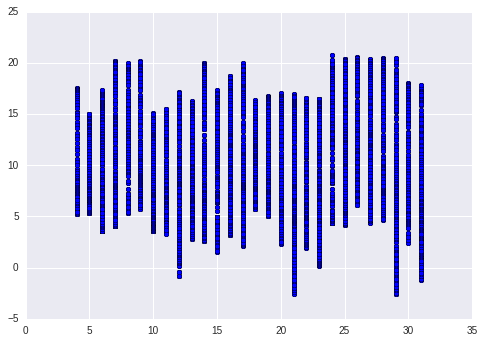

In [20]:
dfjuly = df2[df2['Month'] ==7]

plt.scatter(dfjuly['Day'], dfjuly['Temperature_(degC)'] )